# Проект "Определение потенциально популярного продукта в сфере компьютерных игр"

## 1. Изучение общей информации<a id="start"> </a>

    В проекте необходимо проанализировать рынок компьютерных игры, чтобы определить для каких продуктов и платформ следует проводить активные рекламные компании крупному интернет-магазину видеоигр. Для анализа доступны исторические данные о продажах игр из открытых источников, оценок пользователей и экспертов, жанров платформ. Стоит задача планирования рекламной компании на следующий год.
    В работе планируется произвести:
1. [Изучить общую информацию о предоставленных данных;](#start)
2. [Выполнить предобработку;](#1)
3. [Аналих суммарные продажи в разных регионах](#2)
4. [Исследовательский анализ данных:](#3)
5. [Составить портрет пользователя по регионам ](#5)
6. [Проверить гипотезы](#6)
7. [Сформулировать общий вывод.](#7)

        Входные данные 
  - Исторические данные о продажах игр, с указанием рейтингов пользователей и критиков



In [80]:
import pandas as pd # <импорт библиотеки pandas>
import matplotlib.pyplot as plt  # <импорт библиотеки matplotlib>
import numpy as np # <импорт библиотеки numpy>
import seaborn as sns
import scipy.stats as st  # <импорт scipy.stats>
from IPython.display import display# <импорт метода display из библиотеки IPython.display для просмотра таблиц>
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)


Прочитаем файл games.csv

In [81]:
data_games = pd.read_csv('E:/csv_comp_games/games.csv') # <чтение файла с данными с сохранением их в переменной data_games>

Посмотрим таблицу data_games, выведем ее на экран

In [82]:
display(data_games.head())#вывод на экран таблицы data_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Необходимо откорректировать названия столбцов - привести их к нижнему регистру, для единообразия

Посмотрим общую информацию о таблице

In [83]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица состоит из 11 столбцов, и 16715 строк. Во многих столбцах присутствуют пропущенные значения, необходимо подробно посмотреть эти данные. Также есть проблемы с типами данных, у столбцов с оценкой критиков Critic_Score и оценкой пользователей User_Score типы float64  и object, необходимо заменить их на числовой, согласно условиям они могут принимать значения максимум 100 и максимум 10, поэтому их текущие типы нелогичны. 

## Вывод

Предоставленные данные о продажах видеоигр содежат 16715 строк и 11 столбцов, данные довольно полные, пропущенные данные есть не по всем столбцам. Для дальнейшей работы с данными, нужно откорректировать названия столбцов, изменить типы данных и изучить пропущенные значения столбцов User_Score и Critic_Score. Также в таблице приведены данные о продажах Америке, Европе, Японии и прочих регионов, не хватает сводного столбца с общей суммай продаж, необходимо добавить эти данные в таблицу.

## 2. Предобработка данных<a id="1"> </a>

### 2.1 Корректировка названий столбцов

Приведем названия столбцов к нижнему регистру:

In [84]:
data_games.columns = data_games.columns.str.lower()#приведение к нижнему регистру

Выведем названия столбцов на экран

In [85]:
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Изменение типов данных и замена пропущенных значений

Посмотрим какие уникальные значения содержатся в столбцах Critic_Score и User_Score, чтобы решить на какой тип данных менять

In [86]:
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [87]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [88]:
data_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [89]:
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Изменим тип данных user_score c object на  float методом to_numeric, с параметром errors='coerce', поскольку мы еще не работали с пропусками

In [90]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')#изменение типа данных на flout


Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [91]:
data_games.isnull().sum()# <суммарное количество пропусков, выявленных методом isnull() в таблице data


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Большое количество пропущенных значений присутствует в столбцах critic_score, user_score - это говорит, о том, что не для всех данных есть информация о рейтинге и оценках, можно попробовать посчитать средние и медианы по данным столбцам в разрезе жанров, и оценить возможность произвести заполненение пропусков данными метриками. Возжможно по ряду игр пользователи и критики не оставляли оценки, поэтому и присуствуют ропущенные значения в данных. А пропуски в столбце rating могут возникнуть в следствие, того что организация ESRB основана а 1994 году, возможно по некоторым играм выпущенным ранее 1994 возрастные группы не оценивались, либо вообще видеоигра имеет рейтинг присвоенный другой рейтинговой организацией, а не ESRB, поэтому данный столбец оставим без изменения, в нем не будем заполнять пропуски. Что касательно пропущенных значений в столбце year_of_release, их не очень много 269 штук, возможно это связано с тем, что выходили какие-то новые версии игр и не указан год, доля таких записке в общем количестве небольшая, удалим данные пропущенным годом. 

В столбцах name и genre всего по 2 пропущенных значения, выведем данные строки на экран

In [92]:
display(data_games[data_games['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это одни и те же записи, удалим их, поскольку по ним практически оствует вся инфомация, удаление этих строк не окажет влияния на результаты анализа.

In [93]:
data_games.dropna(subset = ['name'], inplace = True) #удаление пропущенных значений методом dropna с условием по столбцу г

Проверим, что пропуски в столбцах name и genre удалились

In [94]:
data_games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Построим гистограммы по столбцам critic_score user_score

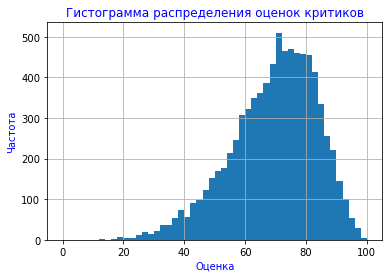

In [95]:
pd.Series(data_games['critic_score']).hist(bins=50, range = (0, 100))
plt.title('Гистограмма распределения оценок критиков', fontsize=12, color='blue')
plt.xlabel('Оценка', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.show()

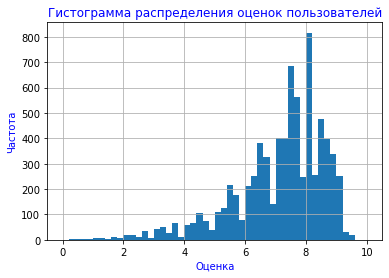

In [96]:
pd.Series(data_games['user_score']).hist(bins=50, range = (0, 10))
plt.title('Гистограмма распределения оценок пользователей', fontsize=12, color='blue')
plt.xlabel('Оценка', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.show()

Сгруппируем данные по жанру, выведем информацию critic_score и user_score, посчитаем среднее и медиану

In [97]:
data_games.pivot_table(index = 'genre', values = ['critic_score', 'user_score'], aggfunc = ['mean', 'median']) \
                        .reset_index()
                        

genre         mean                  median           
                 critic_score user_score critic_score user_score
0         Action    66.629101   7.054044         68.0        7.4
1      Adventure    65.331269   7.133000         66.0        7.6
2       Fighting    69.217604   7.302506         72.0        7.6
3           Misc    66.619503   6.819362         69.0        7.1
4       Platform    68.058350   7.301402         69.0        7.7
5         Puzzle    67.424107   7.175000         70.0        7.5
6         Racing    67.963612   7.036193         69.0        7.4
7   Role-Playing    72.652646   7.619515         74.0        7.8
8        Shooter    70.181144   7.041883         73.0        7.4
9     Simulation    68.619318   7.134593         70.0        7.5
10        Sports    71.968174   6.961197         75.0        7.4
11      Strategy    72.086093   7.295177         73.0        7.8

Разница между медианой и средним небольшая, у гистограмм нет большого хвоста, заменим пропущенные значения в столбцах user_score и critic_score на средние в разрезе жанра.

In [98]:
data_games['user_score'] = data_games['user_score'].fillna(data_games.groupby('genre')['user_score'].transform('mean'))#замена пропущенных значение на срединие по группе
data_games['critic_score'] = data_games['critic_score'].fillna(data_games.groupby('genre')['critic_score'].transform('mean'))

Удалим данные с пропусками в столбце year_of_release

In [99]:
data_games.dropna(subset = ['year_of_release'], inplace = True) #удаление пропущенных значений методом dropna с условием по столбцу

In [100]:
data_games.isnull().sum()#выедем данные о пропущенных значениях

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Заменим тип данных столбца critic_score с float на int методом astype, поскольку в столбце больше нет пропущенных значений, а оценка критиков выражена целыми числами. И также в столбце year_of_release изменим тип с float на int, на datatime менять не будем, поскольку у нас указан только год

In [101]:
data_games['critic_score'] = data_games['critic_score'].astype('int64')
data_games['year_of_release'] = data_games['year_of_release'].astype('int64')

In [102]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [103]:
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Проверим на наличие дубликатов

In [104]:
print('количество дубликатов:',data_games.duplicated().sum())

количество дубликатов: 0


### 2.3 Посчитаем суммарные продажи во всех регионах<a id="1"> </a>

In [105]:
data_games['total_sales'] = data_games.iloc[:,4:8].sum(axis=1)

In [106]:
display(data_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68,7.301402,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72,7.619515,NaN,31.38


## Вывод

Была выполнена предобработка данных. Приведены к нижнему регистру названия столбцов, для единообразия (методом str.lower), изменены типы данных по столбцам user_score с object на float,  и critic_score с float на int (методами to_numeric и astype). Данные изучены на предмет пропущенных значений (методами isnull().sum()). После рассмотрения гистограмм по распределению значений critic_score и user_score, и подсчетов медианных и средних значений в разрезе жанров, было принято решение заполнить пропуски средним (методом fillna), поскольку у гистограмм нет длинных хвостов, данные распределены достаточно равномерно, разница между медианой и средним небольшая. Проверка на наличие дубликатов показала их отсутствие. В таблицу data_games был добавлен столбец total_sales, содержащий суммарную продажу по всем регионам, данная информация необходима для дальнейшего анализа.

## 3. Исследовательский анализ данных<a id="3"> </a>

### 3.1 Динамика количества выпущенных игр в разные года<a id="4"> </a>

Сформируем сводную таблицу с информацие о количестве выпущенных игр в разрезе годов

In [107]:
count_from_year = data_games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count') \
                    .reset_index() \
                    .rename(columns={'name':'count'}) #сводная таблица с подсчетом количества в группе, переиндексация и переименование столбцов

In [108]:
count_from_year.head(10)

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


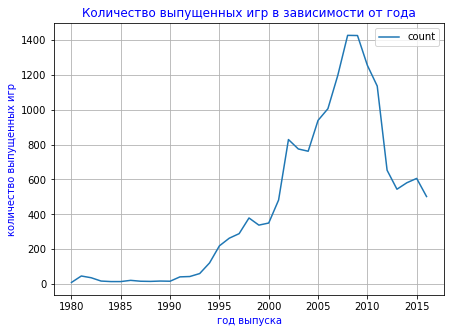

In [109]:

count_from_year.plot(x='year_of_release', y='count', grid=True, figsize=(7, 5))#график методом plot
plt.title('Количество выпущенных игр в зависимости от года', fontsize=12, color='blue')
plt.xlabel('год выпуска', fontsize=10, color='blue')
plt.ylabel('количество выпущенных игр', fontsize=10, color='blue')
plt.show()

По графику можно заметить, что до 1995 года рынок компьютерных игр был не очень развит, выпускались единичные игры, это связано с тем, что в принципе не так сильно были распространены и доступны для широкой публики домашние компьютеры, затем эта сфера начала активно развиваться, также благодаря развитию киноиндустрии, много игр с середины 90-х начали выпускать по мотивам фильмов. Ппосле 2000 года резко возросло количество выпускаемых на рынок игр и в 2002 году  достигло значения в 800 игр, затем после небольшого спада в 2008-2009 годах объем рынка игр достиг своего максимума, это связано с тем, что с 2005-2006 года началась новая эпоха видеоигр с высоким разрешением, а  замтем после 2011 года начался спад, вероятно стали больше разрабатывать мобильные игры, из-за распространенности различных гаджетов. Для дальнейшего анализа можно будет использовать период начиная с 1995 года, когда количество видеоигр на рынке было уже существенным.

Сделаем срез начина с 1995 года, и дальше будем работа с ним

In [110]:
data_games_after1995 = data_games.query('year_of_release >= 1995')#срез по условию год выпуска больше либо равен 1995

Посмотрим, как менялись продажи по платформам. 

In [111]:
top_platform = data_games_after1995.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum') \
                .sort_values(by = 'total_sales', ascending = False) \
                .reset_index()#сводная таблица в разрезе платформ с подсчетом суммы продаж, переиндексация и сортировка по убыванию по сумме продаж
top_platform.head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,721.55
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Выберем платформы с суммарными продажами более 800 миллионов копий, получится топ 5 платформ

In [112]:
top5_platform = top_platform.query('total_sales > 800')
name_top5 = top5_platform['platform']


In [113]:
data_games_top5 = data_games_after1995.query('platform in @name_top5')#срез из общей таблице содержащий только платформы из топ5, с помощью обращения к внешней переменной


Сформируем сводную таблицу, сгруппировав данные по топ 5 платформам в разрезе годов выпуска, с указанием продаж

In [114]:
top5_from_year = data_games_top5.pivot_table(index = ['year_of_release'], columns = ['platform'], values = 'total_sales', aggfunc = 'sum') \
                            .reset_index()

display(top5_from_year.head())             

platform,year_of_release,DS,PS2,PS3,Wii,X360
0,2000,NaN,39.17,NaN,NaN,NaN
1,2001,NaN,166.43,NaN,NaN,NaN
2,2002,NaN,205.38,NaN,NaN,NaN
3,2003,NaN,184.31,NaN,NaN,NaN
4,2004,17.27,211.81,NaN,NaN,NaN


Отобразим графически динамику продаж по топ5 платформам в разезе годов выпуска

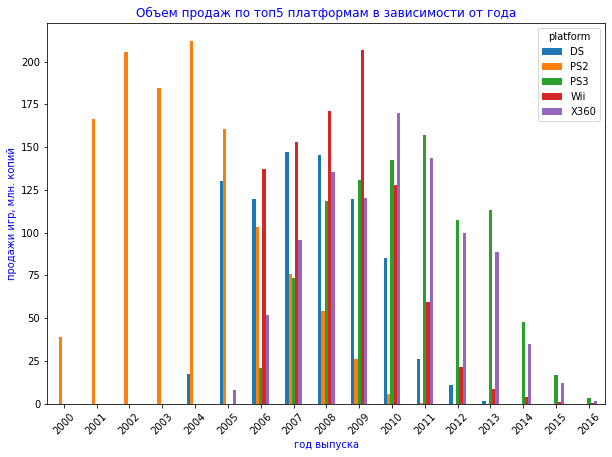

In [115]:
top5_from_year.plot(x='year_of_release', y=['DS', 'PS2', 'PS3', 'Wii', 'X360'], kind="bar", figsize=(10, 7))
plt.title('Объем продаж по топ5 платформам в зависимости от года', fontsize=12, color='blue')
plt.xlabel('год выпуска', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.xticks(rotation = 45)
plt.show()

Посмотрим график в другом виде

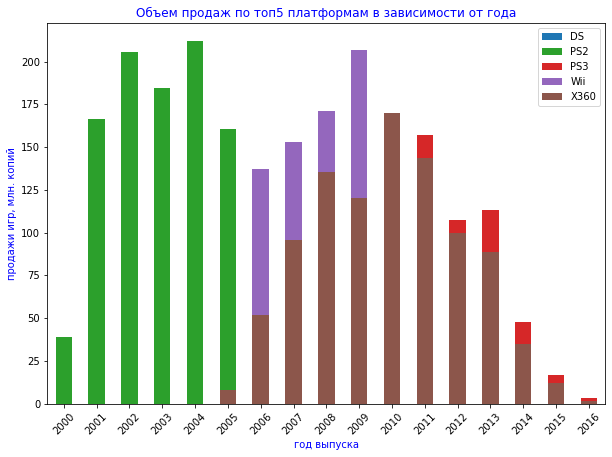

In [116]:
ax = top5_from_year.plot(x="year_of_release", y="DS", kind="bar", figsize=(10, 7))
top5_from_year.plot(x="year_of_release", y="PS2", kind="bar", ax=ax, color="C2")
top5_from_year.plot(x="year_of_release", y="PS3", kind="bar", ax=ax, color="C3")
top5_from_year.plot(x="year_of_release", y="Wii", kind="bar", ax=ax, color="C4")
top5_from_year.plot(x="year_of_release", y="X360", kind="bar", ax=ax, color="C5")
plt.title('Объем продаж по топ5 платформам в зависимости от года', fontsize=12, color='blue')
plt.xlabel('год выпуска', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.xticks(rotation = 45)
plt.show()

По данным графикам наглядно видно, что каждая платформа из топ5 существуют около 10 лет, при этом примерно через четыре года после того как на новой платформе начинают выпускать игры, они достигают пика продаж, появляются новые платформы и на старой продажи идут на спад. Наибольшее многообразие платформ и игр началось с 2006 года, получается за последние 10 лет, последние пики продаж были по платформе Wii в 2009 году, примем период с 2009 по 2016 год за актуальный и продолжим анализ на его основе.

### 3.2 Анализ продаж игр за период 2009-2016

Сделаем срез из таблицы data_games_after1995 по дате выпуска игр, начиная с 2009 года

In [117]:
data_games_after2009 = data_games_after1995.query('year_of_release >= 2009')#срез по условию год выпуска больше либо равен 2009)

In [118]:
top_platform_after2009 = data_games_after2009.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum') \
                .sort_values(by = 'total_sales', ascending = False) \
                .reset_index()#сводная таблица в разрезе платформ с подсчетом суммы продаж, переиндексация и сортировка по убыванию по сумме продаж


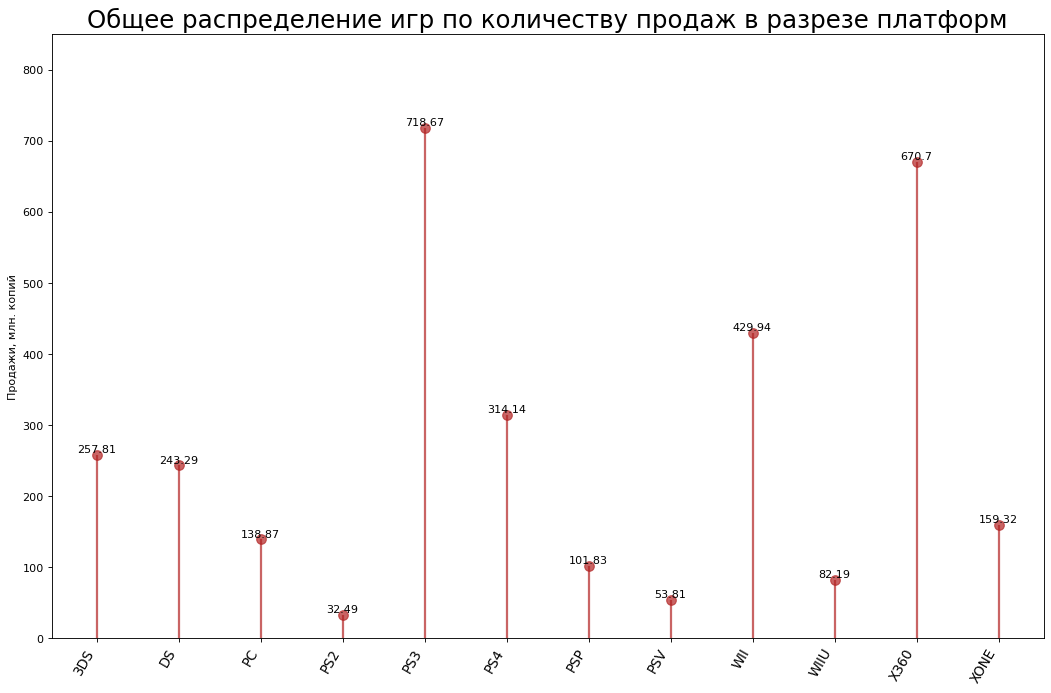

In [119]:
df = data_games_after2009.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.total_sales, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.total_sales, s=75, color='firebrick', alpha=0.7)
#подписи и заголовки
ax.set_title('Общее распределение игр по количеству продаж в разрезе платформ', fontdict={'size':22})
ax.set_ylabel('Продажи, млн. копий')
ax.set_xticks(df.index)
ax.set_xticklabels(df.platform.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 850)
for row in df.itertuples():
    ax.text(row.Index, row.total_sales+.5, s=round(row.total_sales, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)

За период с 2009 года лидируют по продажам следующие платформы: PS3, X360, Wii, PS4 и 3DS. Посмотрим подробнее по данным платформам, в динамике как ведут себя продажи игр по этим платфорам за период с 2009 по 2016 года. Сформируем сводную таблицу, сгруппировав данные по топ 5 платформам в разрезе годов выпуска, с указанием продаж, как делали ранее

Выберем платформы с суммарными продажами более 250 миллионов копий, получится топ 5 платформ

In [120]:
top5_platform_new = top_platform_after2009.query('total_sales > 250')
name_top5_new = top5_platform_new['platform']


In [121]:
name_top5_new

0     PS3
1    X360
2     Wii
3     PS4
4     3DS
Name: platform, dtype: object

In [122]:
data_games_top5_new = data_games_after2009.query('platform in @name_top5_new')#срез из общей таблице содержащий только платформы из топ5, с помощью обращения к внешней переменной


In [123]:
top5_new_from_year = data_games_top5_new.pivot_table(index = ['year_of_release'], columns = ['platform'], values = 'total_sales', aggfunc = 'sum') \
                            .reset_index()

display(top5_new_from_year)  

platform,year_of_release,3DS,PS3,PS4,Wii,X360
0,2009,NaN,130.93,NaN,206.97,120.29
1,2010,NaN,142.17,NaN,127.95,170.03
2,2011,63.20,156.78,NaN,59.65,143.84
3,2012,51.36,107.36,NaN,21.71,99.74
4,2013,56.57,113.25,25.99,8.59,88.58
5,2014,43.76,47.76,100.00,3.75,34.74
6,2015,27.78,16.82,118.90,1.14,11.96
7,2016,15.14,3.60,69.25,0.18,1.52


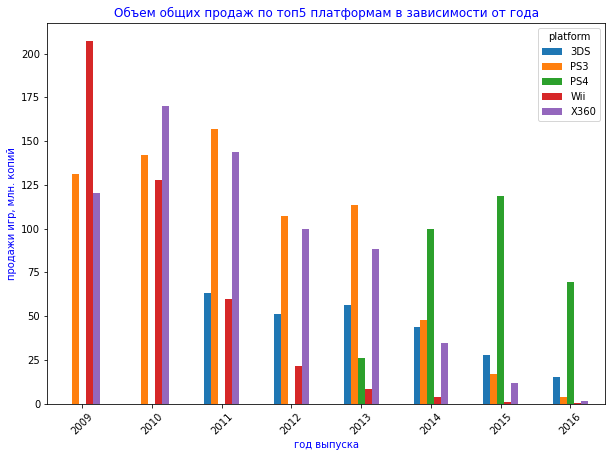

In [124]:
top5_new_from_year.plot(x='year_of_release', y=['3DS', 'PS3', 'PS4', 'Wii', 'X360'], kind="bar", figsize=(10, 7))
plt.title('Объем общих продаж по топ5 платформам в зависимости от года', fontsize=12, color='blue')
plt.xlabel('год выпуска', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.xticks(rotation = 45)
plt.show()

По всем топ пяти платформам за последний год произошло снижение продаж видеоигр, но при этом платформам Wii и  X360 за последний год продажи вообще практически отстуствуют, в то время как по PS4 продажи за 2016 годы были самими высокими среди всех этих платформ. Поэтому PS4 можно назвать самой потенциально прибыльной платформой, поскольку у нее еще не закончился цикл жизни продукта, и также в списко потенциально прибыльных из данных пяти, можно отести PS3, по ней также присутствовали продажи за 2016 год.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [125]:
data_top = data_games_top5_new.groupby(['platform', 'year_of_release']) \
                  .agg({'total_sales':'sum', 'name':'count'}) \
                  .reset_index() \
                  .rename(columns={'total_sales':'total_sales','name':'count'})#сгруппируем наши топ5 по году выпуска и по платформе

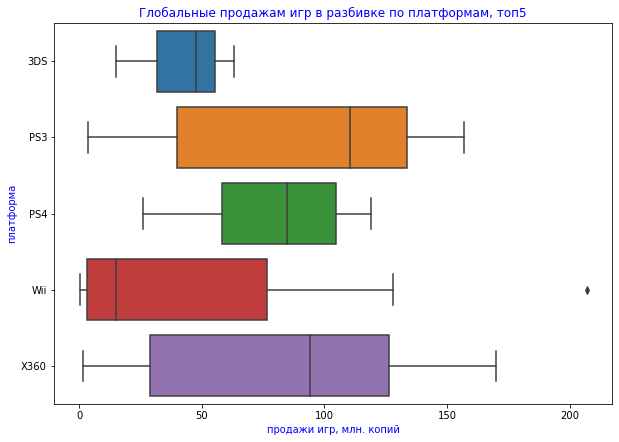

In [126]:
top_platforms = data_top.platform.value_counts().sort_values(ascending = False).index.values
plt.figure(figsize=(10, 7))
sns.boxplot(y='platform', x="total_sales", data=data_top[data_top.platform.isin(top_platforms)], orient="h")
plt.title('Глобальные продажам игр в разбивке по платформам, топ5', fontsize=12, color='blue')
plt.xlabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.ylabel('платформа', fontsize=10, color='blue')
plt.show()

По графику видно, что большая часть значений количества продаж лежит в диапазоне до 120 млн копий для платформ PS3 и X360 и до 105 млн копий для платформы PS4, до 75 млн копий для Wii и до 55 млн копий для 3DS. При этом первый квартиль у платформы PS4 находится на уровне 63 млн копий, т.е. 25 процентов игр платформы PS4 продавались за указанные период в размере 63 млн. копий по всему миру, отличный результат. Медиана по продажам больше всего у платформы PS3, составляет в районе 110 млн.  Значения свяше 200 млн. можно считать выбросом.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Сделаем срез из общей таблицы data_games_after2009 по платформе PS4

In [ ]:
data_games_PS4 = data_games_after2009.query('platform == "PS4"')


In [ ]:
games_PS4_score = data_games_PS4.pivot_table(index = ['year_of_release', 'name'] , values = ['critic_score', 'user_score','total_sales'], aggfunc = 'sum') \
                            .reset_index()
display(games_PS4_score.head())

In [ ]:
games_PS4_score.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 7))
plt.title('Зависимость продаж от отзывов критиков по платформе PS4 ', fontsize=12, color='blue')
plt.xlabel('Оценка критиков', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.show()

In [ ]:
games_PS4_score.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 7))
plt.title('Зависимость продаж от отзывов пользователей по платформе PS4 ', fontsize=12, color='blue')
plt.xlabel('Оценка пользователей', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.show()

Посчитаем коэфицциенты Пирсона (корреляцию)

In [ ]:
print('Зависимость продаж от оценок критиков', games_PS4_score['total_sales'].corr(games_PS4_score['critic_score']))
print('Зависимость продаж от оценок пользователей', games_PS4_score['total_sales'].corr(games_PS4_score['user_score']))


В целом можно сказать, что самые высокие продажи бывают у игр с очень хорошими оценками критиков, коээфициенты корреляции подтверждают, что между продажами и оценками критиков прямая зависимость, чем лучше оценка, тем выше продажи, а с зависимостью продаж от оценок пользователей иная ситуация, связь очень слабая но при этом отрицательная, возможно это связано с тем, что критики более комплексно подходят к оценкам, рассматривают разные факрторы, в то время как пользователи оценивают более субъективно, в зависимости от своих предпочтений. 

Посмотрим оценки критиков по топ5 платформам в сравнении:

In [ ]:
top_platforms = data_games_top5_new.platform.value_counts().sort_values(ascending = False).index.values
plt.figure(figsize=(10, 7))
sns.boxplot(y="platform", x="critic_score", data=data_games_top5_new[data_games_top5_new.platform.isin(top_platforms)], orient="h")
plt.title('Зависимость продаж от отзывов критиков по топ5 платформ ', fontsize=12, color='blue')
plt.xlabel('Оценка критиков', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.show()

Данный график еще раз подтверждает, что делать ставки на PS4 и PS3 верное решение, у данных платформ хорошие оценки критиков, и в связи с тем что между оценкой критиков и продажами есть хорошая корреляция, по этим платформам продажи будут держаться на хорошем уровне.

Посмотрим на общее распределение игр по жанрам и по количеству продаж на основе выборки data_games_after2009

Посмотрим, какие уникальные жанры у нас есть

In [ ]:
data_games_after2009['genre'].unique()

Посмотрим на распределение жанров в разере количества общих продаж, для этого построим график

In [ ]:
# считаем число проданных и вышедших игр по жанрам
genres_df = data_games_after2009.groupby('genre')[['total_sales']].sum().join(
    data_games_after2009.groupby('genre')[['name']].count()
)
genres_df.columns = ['total_sales', 'number_of_games']
genres_df.sort_values('total_sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=genres_df.index,
    y=genres_df.total_sales,
    name='total_sales'
)

trace1 = go.Bar(
    x=genres_df.index,
    y=genres_df.number_of_games,
    name='number_of_games'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of genre', 'xaxis': {'title': 'genre'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Больше всего выпускается игр в жанре Action аж 1767 игр за рассматриваемый период, но при этом количество млн. проданных копий в два раза меньше. Меньше всего выпускают игр в жанрах Platform и Pazzle (их примерно одинаковое количество 182 и 193 игры соответсвенно), при этом количество млн. проданных копий , Platform в два раза больше чем у Pazzle. Интересная статистика по жанру Shooter, по нему  549 млн проданных копий, а игр при этом выпущено 500 штук, т.е. у них на каждую игру очень хорошая прибыльность. Хорошо показывают себя жанры Sports, Misc и Role-Playing, таких игр много выпускают (до 800 штук) и также они хорошо стабильно продаются от 350 до 465 млн. копий. А вот по жанру Adventure выпускается очень много игр, но они очень плохо продаются, на этот жанр интернет магазину точно не стоит делать ставку. Лучше всего продавать активно игры в жанрах Action, Shooter и Sports.


## Вывод

Объем выпускаемых на рынок игр начал расти с 1995 года, а после 2000 начался настоящий бум, своего максимума многообразие достигло в 2008-2009 годах, после этого начался спад. Ранее 1995 года анализировать рынок не имеет смысла, в связи с этим был сделан срез по году выпуска начиная с 1995 года, и уже на этой выборке мы изучили продажи в разрезе платформ, с помощью метода построения сводных таблиц pivot. Из выборки сделали срез включающий платформы с продажами более 800 млн копий - топ5. В анализе использовались методы построения графиков plot, чтобы посмотреть динамику продаж в разрезе платформ за несколько лет. Графики наглядно иллюстрируют, что срок жизни каждой платформы примерно 10 лет, и поведение по продажам у них схоже, сначала после выпуска  - они низкие, затем в течение 4-5 лет растут, достигая своего пика, а потом начинается спад. Исходя из поведения продаж, был выбран актуальный перидо для анализа с 2009 по 2016 года, и уже по нему можем сказать, что лидирующие позиции по объему продаж занимают платформы PS3, X360, Wii, PS4 и 3DS. По всем топ пяти платформам за последний год произошло снижение продаж видеоигр, но при этом платформам Wii и X360 за последний год продажи вообще практически отстуствуют, в то время как по PS4 продажи за 2016 годы были самими высокими среди всех этих платформ.  PS4 можно назвать самой потенциально прибыльной платформой, поскольку у нее еще не закончился цикл жизни продукта, 25 процентов игр платформы PS4 продавались за указанный период в размере 63 млн. копий по всему миру, отличный результат. Также Медиана по продажам больше всего у платформы PS3, составляет в районе 110 млн, ее также можно отнести к перспективным. Плюс у данных платформ довольно высокие оценки критиков, а данный показатель имеет прямую корреляцию с уровнем продаж. Самымы популярными с многообразным количеством игр являются жанры  Action, Shooter и Sports, и они хорошо продаются, а вот на  жанр Adventure  интернет магазину точно не стоит делать ставку, иго много, а продаются плохо. В любом случае продажи конкретного жанра зависят от региона, это тоже стоит учитывать

## 4. Исследование портрета пользователя по регионам<a id="5"> </a>

Составим топ5 самых популярных платформ в разрезе регионов NA, EU, JP за период с 2009 по 2016 года

In [ ]:
top5_platform_region_na = data_games_after2009.pivot_table(index = ['platform'], values = 'na_sales', aggfunc = 'sum') \
                .sort_values(by = 'na_sales', ascending = False) \
                .reset_index() \
                .head(5)#сводная таблица в разрезе платформ и регионов, топ.5 по продажам в na
top5_platform_region_na

In [ ]:
top5_platform_region_eu = data_games_after2009.pivot_table(index = ['platform'], values = 'eu_sales', aggfunc = 'sum') \
                .sort_values(by = 'eu_sales', ascending = False) \
                .reset_index() \
                .head(5)#сводная таблица в разрезе платформ и регионов, топ.5 по продажам в na
top5_platform_region_eu

In [ ]:
top5_platform_region_jp = data_games_after2009.pivot_table(index = ['platform'], values = 'jp_sales', aggfunc = 'sum') \
                .sort_values(by = 'jp_sales', ascending = False) \
                .reset_index() \
                .head(5)#сводная таблица в разрезе платформ и регионов, топ.5 по продажам в na
top5_platform_region_jp

Объединим все три таблички  таблички в одну

In [ ]:
top_region_na_eu = top5_platform_region_na.merge(top5_platform_region_eu, on= 'platform', how='outer')
top_region = top_region_na_eu.merge(top5_platform_region_jp, on= 'platform', how='outer')
top_region

In [ ]:
top_region.plot(x='platform', y=['na_sales', 'eu_sales', 'jp_sales'], kind="bar", figsize=(10, 7))
plt.title('Объем общих продаж топ5 платформ в разрезе региона', fontsize=12, color='blue')
plt.xlabel('Платформа', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.show()

Самой популярной платформой в Северной Америке является X360, вероятно это связано с тем что эта приставка разработана компанией Microsoft, поэтому и имеет такую огромную популярность в Америке, около 400 млн. копий продано в данном регионе за рассматриваемый период. В Америке в целом большая популярность видеоигр на приставках, поэтому в топ 5 и выделяются X360, PS3, Wii, DS и PS4. в Европе продажи по платформе  X360 также велики, но меньше чем самая популярная в Европе PS3, поскольку в Европе люди больше играют в видеогры не консольные, а на компьютере, вероятно это связано с возрастной категорией геймеров и их образом жизни. Япония очень высокотехнологичная и патриотичная страна, поэтому американская платформа X360 не получила популярности, зато лидерами в Японии среди игровых платформ являются разработанные у них 3DC и PSP, и продажи по  игровым платформам в Японии в принципе иеньше чем в Америке, вероятно потому, что в Японии раньше получили популярность игры на мобильных устройствах и прочих гаджетах, опять таки из-за того, что страна очень высокотехнологичная.

Посмотрим какие жанры видеоигр популярны в данных регионах, также составим топ5

In [ ]:
#формируем сводную таблицу топ 5 жанров по продажам в Северной америке
top5_genre_region_na = data_games_after2009.pivot_table(index = ['genre'], values = 'na_sales', aggfunc = 'sum') \
                .sort_values(by = 'na_sales', ascending = False) \
                .reset_index() \
                .head(5)

#формируем сводную таблицу топ 5 жанров по продажам в Европе
top5_genre_region_eu = data_games_after2009.pivot_table(index = ['genre'], values = 'eu_sales', aggfunc = 'sum') \
                .sort_values(by = 'eu_sales', ascending = False) \
                .reset_index() \
                .head(5)

#формируем сводную таблицу топ 5 жанров по продажам в Японии
top5_genre_region_jp = data_games_after2009.pivot_table(index = ['genre'], values = 'jp_sales', aggfunc = 'sum') \
                .sort_values(by = 'jp_sales', ascending = False) \
                .reset_index() \
                .head(5)

In [ ]:
#объединим полученные сводные таблицы в одну методом merge
top_region_genre_na_eu = top5_genre_region_na.merge(top5_genre_region_eu, on= 'genre', how='outer')
top_region_genre = top_region_genre_na_eu.merge(top5_genre_region_jp, on= 'genre', how='outer')
top_region_genre

In [ ]:
top_region_genre.plot(x='genre', y=['na_sales', 'eu_sales', 'jp_sales'], kind="bar", figsize=(10, 7))
plt.title('Объем общих продаж топ5 платформ в разрезе жанров и регионов', fontsize=12, color='blue')
plt.xlabel('Жанр', fontsize=10, color='blue')
plt.ylabel('продажи игр, млн. копий', fontsize=10, color='blue')
plt.show()

В Японии самым популярным жанром является Role-Playing, в связи с тем, что большинство таких игр было разработано в Японии и в первую очередь для внутреннего японского рынка для игровых приставок, соответственно в Америке и Европе этот жанр имеет наименьшую популярность. В Америке и Европе, по популярности жанров рейтинг одинаковы, на первом месте Action, это связано с особенностью аудитории геймеров, их предпочтениями, в Америке и Европе они схожи. 

Посмотрим, влияет ли рейтинг ESBR на продажи в Америке

In [ ]:
data_games_after2009['rating'].unique()

In [ ]:
data_games_rating_na = data_games_after2009.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum') \
                    .reset_index()
                    
data_games_rating_na

In [ ]:
data_games_rating_na.plot(x='rating', y='na_sales', grid=True, figsize=(10, 7))#график методом plot
plt.title('Зависимость среднего среднего размера выпущенных игр от рейтинга ESRB', fontsize=12, color='blue')
plt.xlabel('рейтинг ESRB', fontsize=10, color='blue')
plt.ylabel('продажи, млн. копий', fontsize=10, color='blue')
plt.show()

В Америке, наибольшие продажи имеют видеоигры рейтинка М  - для взврослых и Е - для всех, их продажи примерно на одном уровне, 400 млн. копий, самые низкие продажи у игр с рейтингом EC - для детей от трех лет. Определенно рейтинг ESRB влияет на продажи.

## Вывод

Как было сказано выше, платформы PS3 и PS4, являются довольно перспективныии, и еще один плюс за эти две платформы, что они обе очень популярны в Америке и Европе. При планировании рекламной компании и планировании продаж, нужно понимать на какой регион будет направлена реклама, поскольку в разных регионах разнятся предпочтения жанров, если это Америка и Европа - то стоит делать ставку на Action, Shooter и Sport, а если азия и в частности Япония, то - Role-Playing. И вообще к продажам в Японии должен быть свой подход, поскольку там популярность имеет в основном платформа PSP и 3DS, поскольку это их родина, азиатский пользователь очень требователен и патриотичен. Если оринетироваться на Европейского пользователя, то стоит делать стаку на игры с рейтингом от ESRB  М и Е, на платформах PS4 и PS3. 

## 5. Проверка статистических гипотез<a id="6"> </a>

Необходимо проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, сформируем нулевую и альтернативную гипотезы: 
 - H0 - средние пользовательские рейтинги платформ Xbox One и PC равны. 
 - H1 - средние пользовательские рейтинги платформ Xbox One и PC различаются.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var).

In [ ]:
data_games_after2009.head()

Посчитаем дисперсии для наших двух выборок

In [ ]:
data_games_XOne = data_games_after2009.query('platform == "XOne"')['user_score']
data_games_PC = data_games_after2009.query('platform == "PC"')['user_score']
data_games_XOne_mean = data_games_XOne.mean()
data_games_PC_mean = data_games_PC.mean()

In [ ]:
variance_data_games_XOne = np.var(data_games_XOne)
print('дисперсия для выборки по платформе XOne', variance_data_games_XOne)

In [ ]:
variance_data_games_PC = np.var(data_games_PC)
print('дисперсия для выборки по платформе PC', variance_data_games_PC)

Дисперсии выборок примерно одинаковые, поэтому не будем указвать использовать equal_var, по умолчанию он True

In [ ]:
alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(
    data_games_XOne, 
    data_games_PC)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("средние пользовательские рейтинги платформ Xbox One и PC не равны, так как значение стат значимости меньше критического уровня стат  значимости, и мы смогли опровергнуть нулевую гипотезу.")
else:
    print("средние пользовательские рейтинги платформ Xbox One и PC равны, так как значение стат значимости больше критического уровня стат  значимости, и мы НЕ смогли опровергнуть нулевую гипотезу.")
print('средние пользовательские рейтинги Xbox One:', data_games_XOne_mean)
print('средние пользовательские рейтинги PC:', data_games_PC_mean)

Необходимо проверить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные, сформируем нулевую и альтернативную гипотезы: 
 - H0 - средние пользовательские рейтинги жанров Action и Sports равны. 
 - H1 - средние пользовательские рейтинги жанров Action и Sports различаются.

применим метод scipy.stats.ttest_ind (array1, array2, equal_var).

Посчитаем дисперсии для наших двух выборок

In [ ]:
data_games_Action = data_games_after2009.query('genre == "Action"')['user_score']
data_games_Sports = data_games_after2009.query('genre == "Sports"')['user_score']
data_games_Action_mean = data_games_Action.mean()
data_games_Sports_mean = data_games_Sports.mean()

In [ ]:
variance_data_games_Action = np.var(data_games_Action)
print('дисперсия для выборки по жанру Action', variance_data_games_Action)

In [ ]:
variance_data_games_Sports = np.var(data_games_Sports)
variance_data_games_Sports
print('дисперсия для выборки по жанру Action', variance_data_games_Sports)

Дисперсии выборок различаются, поэтому используем параметр equal_var со значением False

In [ ]:
alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(
    data_games_Action, 
    data_games_Sports, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("средние пользовательские рейтинги жанров Action и Sports не равны, так как значение стат значимости меньше критического уровня стат  значимости, и мы смогли опровергнуть нулевую гипотезу.")
else:
    print("средние пользовательские рейтинги жанров Action и Sports равны, так как значение стат значимости больше критического уровня стат  значимости, и мы НЕ смогли опровергнуть нулевую гипотезу.")
print('средние пользовательские рейтинги Action:', data_games_Action_mean)
print('средние пользовательские рейтинги Sports:', data_games_Sports_mean)

## Вывод

        Обе гипотезы сформированы на основе типичной гипозеты о том, что средние двух генеральных совокупностей равны между собой, в качестве нулевой гипотезы указывается, что средние двух генеральных совокупностей равны и соответсвенно альтернативная гипотеза о том, что средние двух генеральных совокупностей не равны между собой. В результате при проверки гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, нам не удалось опровергнуть нулевую гипотезу, о том что средние пользовательиские рейтинги равны, между рейтингами пользователей этих платформ нет статистическая разницы. 
        По второй гипотезе о том, что средние пользовательские рейтинги жанров Action и Sports разные, напротим мы смогли опровергнуть нулевую гипотезу, о том что они равны, таким образом между оценками пользователями данных жанров, есть существенная статистическая разница.

## 6. Общий вывод<a id="7"> </a>

       Общее впечатление от данных такое - они достачно полные, отсутствуют дубликаты, но хотелось бы получить больее полную информацию по оценкам критиков и пользователей, поскольку по этим пуктам много пропущенных значений. В исходном виде данные не подходили для проведения анализа, поэтому проведена работа по предобработке: изменены типы данных по столбцам user_score, critic_score; откорректированы названия столбцов путем приведения их к нижнему регистру, после предварительно анализа стоблцов critic_score и user_score,  было принято решение заполнить пропуски средними значениями в разрезе жанра. 
        В анализе использовались сводные таблицы, гистограммы, диаграммы рассеяния и графики. Все эти методы визуализации, помогли увидеть, динамику объема выпускаемых их и динамику их продаж, после 2000 начался настоящий бум, своего максимума многообразие достигло в 2008-2009 годах, а после этого начался спад. Анализ динамики продаж в разрезе платформ, выявлил, что срок жизни каждой платформы около лет, и после четырех-пяти лет своего существования продажи достигают своего пика, а затем популярность падает, выходят новые платформы. Был выделен топ5 платформ за период 2009-2016, это PS3, X360, Wii, PS4 и 3DS. На продажи платформ  действие оказывают оценки критиков, это подтверждают коэффициент корреляции (Пирсона), чем выше оценки, тем выше продажи. Среди топ5 к наиболее перспективным можно отнести PS3 и PS4, они имеют высокие оценки критиков, 25 процентов игр платформы PS4 продавались за указанный период в размере 63 млн. копий по всему миру, отличный результат, также Медиана по продажам больше всего у платформы PS3, составляет в районе 110 млн.При планировании рекламной компании и планировании продаж, нужно понимать на какой регион будет направлена реклама, поскольку в разных регионах разнятся предпочтения жанров, как и попярности платформ в том числе. Если это Америка и Европа - то стоит делать ставку на Action, Shooter и Sport, а если азия и в частности Япония, то - Role-Playing. В целом, к продажам в Японии, должен быть свой подход, поскольку там популярность имеет в основном платформа PSP и 3DS, поскольку это их родина, азиатский пользователь очень требователен и патриотичен. 
        В предобработке  и анализе данных были использованы такие методы как isnull, groupby, transform, value_counts, duplicated, sort_values, str.lower, apply,isna, pivot, hist, plot.
        При анализе рынка, были проверены две статистические гипотезы (методом scipy.stats.ttest_ind). Обе гипотезы сформированы на основе типичной гипозеты о том, что средние двух генеральных совокупностей равны между собой, в качестве нулевой гипотезы указывается, что средние двух генеральных совокупностей равны и соответсвенно альтернативная гипотеза о том, что средние двух генеральных совокупностей не равны между собой. Результат: средние пользовательские рейтинги платформ Xbox One и PC статистически не различаются и напротив между средними пользовательскими рейтингами жанров Action и Sports есть статистическая разница.
        В результате анализа можно дать рекомендации для интернет магазина: Если оринетироваться на Европейского пользователя, то стоит делать стаку на игры с рейтингом от ESRB  М и Е, на платформах PS4 и PS3, при этом прибыль скорее всего принесут видеигры в жанрах Action, Shooter и Sport. Если же планируются продажи для азиатских пользователей, то ставку нужно сделать на PSP и 3DS и жанр Role-Playing.